In [46]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import h5py

df = pd.read_csv('TrainingData.csv')

df.columns = ['Flow', '1', '2', '3', '4']

flow = df['Flow']
flow = flow.astype(float)

df.drop('Flow', inplace = True, axis = 1)

df = df.astype(float)

df.head()


,1,2,3,4
0,663.0,815.0,1459.0,1469.0
1,663.0,814.0,1458.0,1468.0
2,663.0,814.0,1457.0,1468.0
3,662.0,813.0,1457.0,1467.0
4,662.0,813.0,1457.0,1467.0


In [47]:
flow.head()

0   -0.82857
1   -0.60000
2    0.02857
3   -0.17143
4    0.37143
Name: Flow, dtype: float64

In [48]:
x = range(0, len(df))

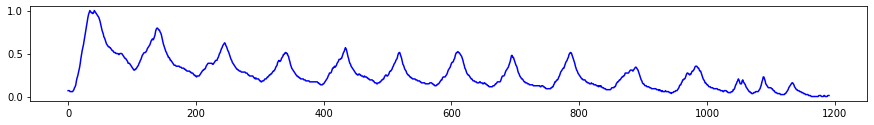

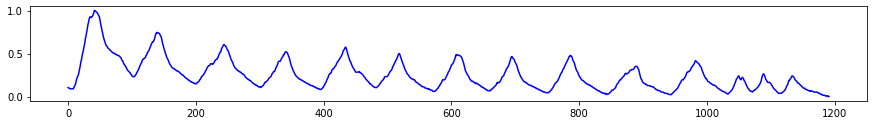

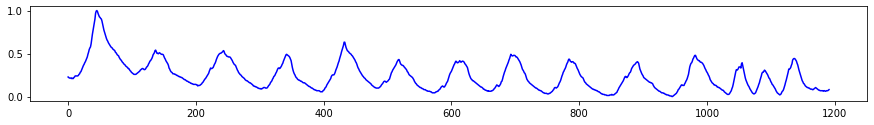

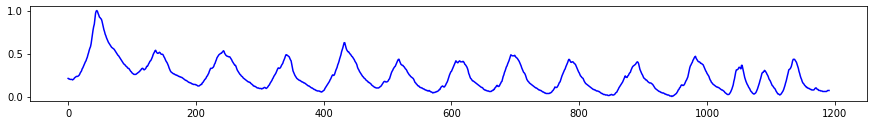

In [68]:
fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,1)
plt.plot(x, df['1'], 'b')
plt.show()

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,2)
plt.plot(x, df['2'], 'b')
plt.show()

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,3)
plt.plot(x, df['3'], 'b')
plt.show()

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,4)
plt.plot(x, df['4'], 'b')
plt.show()

In [50]:
Min_1 = min(df['1'])
Max_1 = max(df['1'])

Min_2 = min(df['2'])
Max_2 = max(df['2'])

Min_3 = min(df['3'])
Max_3 = max(df['3'])

Min_4 = min(df['4'])
Max_4 = max(df['4'])

In [51]:
Max_Flow = max(flow)
Min_Flow = min(flow)

In [52]:
for i in range(0, len(df)):
    
    df['1'][i] = float((float(df['1'][i]) - Min_1) / (Max_1 - Min_1))
    
    df['2'][i] = float((float(df['2'][i]) - Min_2) / (Max_2 - Min_2))
    
    df['3'][i] = float((float(df['3'][i]) - Min_3) / (Max_3 - Min_3))
    
    df['4'][i] = float((float(df['4'][i]) - Min_4) / (Max_4 - Min_4))
    
    flow[i] = float((float(flow[i]) - Min_Flow) / (Max_Flow - Min_Flow))

In [53]:
df.head()

,1,2,3,4
0,0.068182,0.104478,0.226994,0.210526
1,0.068182,0.097015,0.220859,0.204678
2,0.068182,0.097015,0.214724,0.204678
3,0.056818,0.089552,0.214724,0.198830
4,0.056818,0.089552,0.214724,0.198830


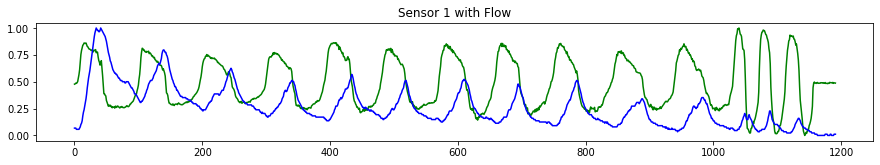

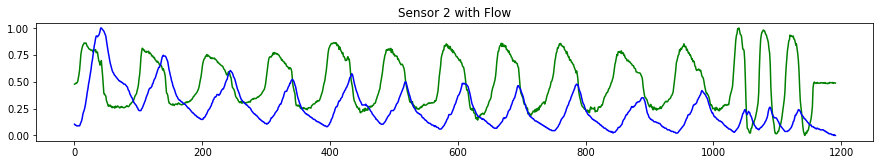

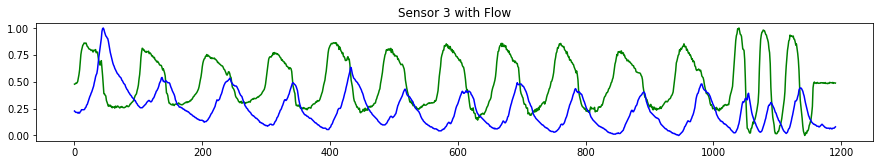

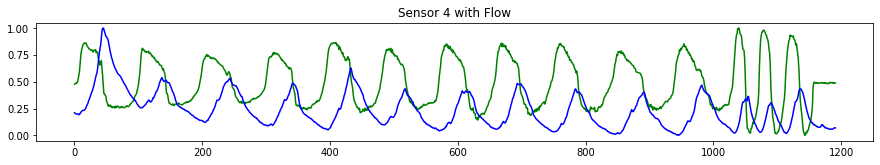

In [54]:
fig = plt.figure(figsize = (15, 10))
plt.subplot(4,1,1)
plt.plot(x, flow, 'g', x, df['1'], 'b')
plt.title('Sensor 1 with Flow')
plt.show()

fig = plt.figure(figsize = (15, 10))
plt.subplot(4,1,2)
plt.plot(x, flow, 'g', x, df['2'], 'b')
plt.title('Sensor 2 with Flow')
plt.show()

fig = plt.figure(figsize = (15, 10))
plt.subplot(4,1,3)
plt.plot(x, flow, 'g', x, df['3'], 'b')
plt.title('Sensor 3 with Flow')
plt.show()

fig = plt.figure(figsize = (15, 10))
plt.subplot(4,1,4)
plt.plot(x, flow, 'g', x, df['4'], 'b')
plt.title('Sensor 4 with Flow')
plt.show()

In [55]:
df.head()

,1,2,3,4
0,0.068182,0.104478,0.226994,0.210526
1,0.068182,0.097015,0.220859,0.204678
2,0.068182,0.097015,0.214724,0.204678
3,0.056818,0.089552,0.214724,0.198830
4,0.056818,0.089552,0.214724,0.198830


In [56]:
def label_fix(label):
    if label < 0.4:
        return 0
    elif label > 0.6:
        return 1
    else:
        return 2

df['Class'] = flow.apply(label_fix)

In [57]:
df.head()

,1,2,3,4,Class
0,0.068182,0.104478,0.226994,0.210526,2
1,0.068182,0.097015,0.220859,0.204678,2
2,0.068182,0.097015,0.214724,0.204678,2
3,0.056818,0.089552,0.214724,0.198830,2
4,0.056818,0.089552,0.214724,0.198830,2


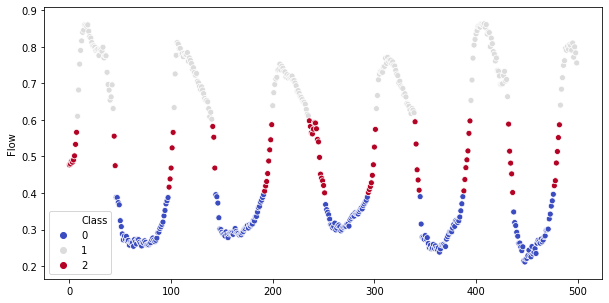

In [67]:
fig = plt.figure(figsize = (10, 5))
sns.scatterplot(y = flow[0:500], x = range(0, 500), hue = df['Class'][0:500], palette = 'coolwarm')

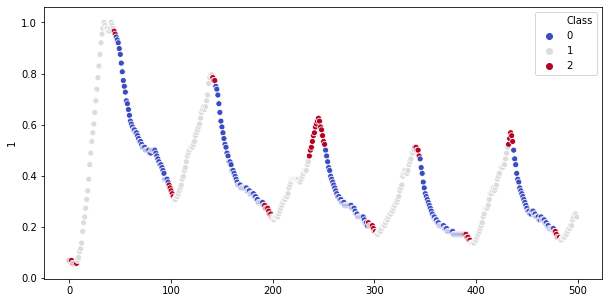

In [66]:
fig = plt.figure(figsize = (10, 5))
sns.scatterplot(y = df['1'][0:500], x = range(0, 500), hue = df['Class'][0:500], palette = 'coolwarm')

In [60]:
# Develop keras sequential model with optimized parameters through grid search cv
model = keras.Sequential()
model.add(keras.layers.Dense(150, activation = tf.nn.relu, input_dim = 4))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(50, activation = tf.nn.relu))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(3, activation = tf.nn.softmax))

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 150)               750       
_________________________________________________________________
dropout_4 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 50)                7550      
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 153       
Total params: 8,453
Trainable params: 8,453
Non-trainable params: 0
_________________________________________________________________


In [61]:
# Create the data matrix and normalize data columns
X = df.drop('Class', axis = 1)

# Create the classification matrix
y = df['Class']

# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
y_test.reset_index(inplace = True, drop = True)
y_train.reset_index(inplace = True, drop = True)

In [64]:
EPOCHS = 50
model.fit(X_train, y_train, epochs = EPOCHS)

Epoch 1/50
834/834 [==============================] - 0s 208us/sample - loss: 1.0734 - acc: 0.4005
Epoch 2/50
834/834 [==============================] - 0s 32us/sample - loss: 1.0284 - acc: 0.4868
Epoch 3/50
834/834 [==============================] - 0s 36us/sample - loss: 1.0178 - acc: 0.4772
Epoch 4/50
834/834 [==============================] - 0s 31us/sample - loss: 1.0095 - acc: 0.4940
Epoch 5/50
834/834 [==============================] - 0s 35us/sample - loss: 1.0085 - acc: 0.4988
Epoch 6/50
834/834 [==============================] - 0s 29us/sample - loss: 0.9928 - acc: 0.5276
Epoch 7/50
834/834 [==============================] - 0s 27us/sample - loss: 0.9900 - acc: 0.5168
Epoch 8/50
834/834 [==============================] - 0s 32us/sample - loss: 0.9879 - acc: 0.5432
Epoch 9/50
834/834 [==============================] - 0s 28us/sample - loss: 0.9813 - acc: 0.5360
Epoch 10/50
834/834 [==============================] - 0s 30us/sample - loss: 0.9674 - acc: 0.5719
Epoch 11/50
834/83

In [65]:
# Scoring the model on testing data from same dataset
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

predictions = model.predict(X_test)

final_pred = []
for score in range(0, len(predictions)):
    final_pred.append(np.argmax(predictions[score]))
    
print(classification_report(y_test, final_pred))

358/358 [==============================] - 0s 112us/sample - loss: 0.8087 - acc: 0.6955
Test accuracy: 0.6955307
              precision    recall  f1-score   support

           0       0.66      0.91      0.76       161
           1       0.81      0.62      0.70       138
           2       0.56      0.31      0.40        59

    accuracy                           0.70       358
   macro avg       0.68      0.61      0.62       358
weighted avg       0.70      0.70      0.68       358

